In [96]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf

In [97]:
# Enter you own Portfolio

tickers = ['AAPL', 'TSLA','NFLX', 'NVDA', 'AMZN', 'GOOG']
amounts = [7, 5 , 12, 16, 2 ,4]
prices = []
total = []

In [98]:
for ticker in tickers:
    try:
        # Retrieve historical stock data from Yahoo Finance using yfinance
        df = yf.download(ticker, start=dt.datetime(2018, 8, 1), end=dt.datetime.now())
        
        # Get the last closing price
        price = df['Close'].iloc[-1]
        
        # Append the closing price to the prices list
        prices.append(price)
        
        # Find the index of the current ticker in the tickers list
        index = tickers.index(ticker)
        
        # Calculate the total value of the stock and append to the total list
        total.append(price * amounts[index])
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Print the results
for ticker, price, value in zip(tickers, prices, total):
    print(f"{ticker}: Last Price - {price}, Total Value - {value}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
AAPL: Last Price - 189.69000244140625, Total Value - 1327.8300170898438
TSLA: Last Price - 234.3000030517578, Total Value - 1171.500015258789
NFLX: Last Price - 465.9100036621094, Total Value - 5590.9200439453125
NVDA: Last Price - 492.9800109863281, Total Value - 7887.68017578125
AMZN: Last Price - 145.17999267578125, Total Value - 290.3599853515625
GOOG: Last Price - 136.94000244140625, Total Value - 547.760009765625


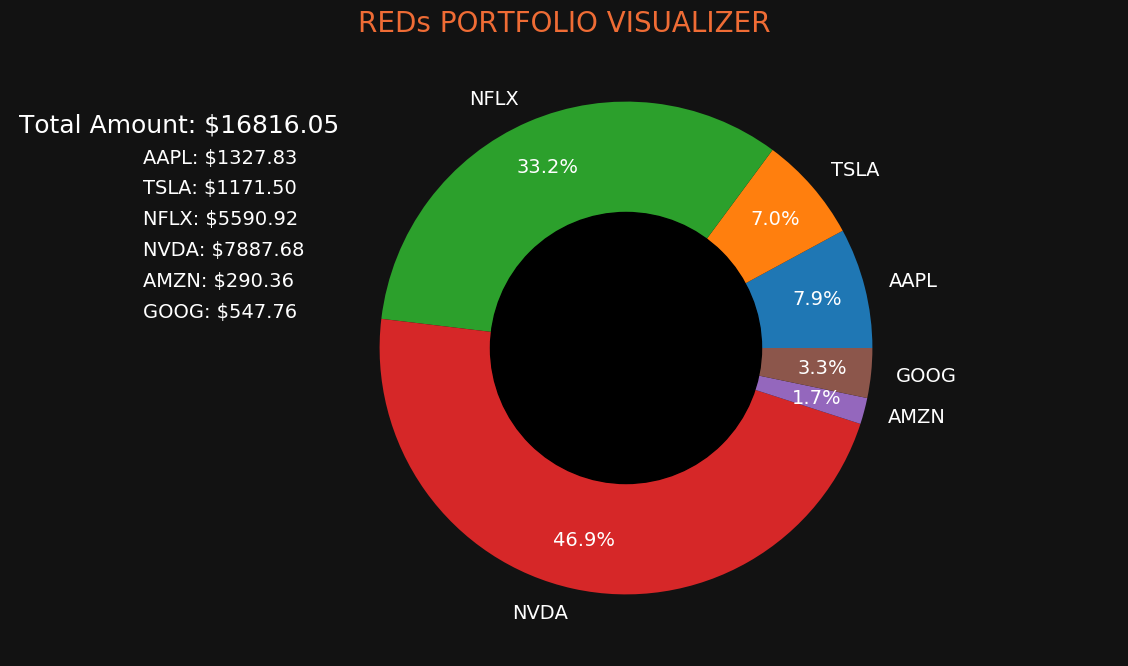

In [99]:
fig, ax = plt.subplots(figsize=(30, 8))
ax.set_facecolor('black')  # Setting the facecolor of the Axes to black
ax.figure.set_facecolor('#121212')  # Setting the facecolor of the Figure to a dark color

ax.tick_params(axis='x', colors='white')  # Setting the tick color for the x-axis to white
ax.tick_params(axis='y', colors='white')  # Setting the tick color for the y-axis to white

# Add your customization here
ax.set_title('REDs PORTFOLIO VISUALIZER', color = '#EF6C35', fontsize = 20)

# Create a pie chart
patches,texts, autotexts = ax.pie(total, labels=tickers, autopct='%1.1f%%', pctdistance= 0.8, textprops={'fontsize': 14})
[text.set_color('white') for text in texts]
[autotext.set_color('white') for autotext in autotexts]

# Add a black circle in the middle to make a donut
my_circle = plt.Circle((0,0), 0.55, color = 'black')
plt.gca().add_artist(my_circle)

# Add a portfolio over view
# Display total amount on the top left
total_amount = sum(total)
ax.text(0.008, 0.85, f'Total Amount: ${total_amount:.2f}', color='white', fontsize=18, transform=ax.transAxes)

# Display total price for each stock
for i, (label, value) in enumerate(zip(tickers, total)):
    ax.text(0.12, 0.8 - i * 0.05, f'{label}: ${value:.2f}', color='white', fontsize=14, transform=ax.transAxes)

# Use to adjust the black background    
ax.set_xlim(-2.5, 2)
    
plt.show()
